# Theory/ Formulae for Computation

# Code

In [15]:
import geopy.distance
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interactive
import ipywidgets as widgets

In [2]:
# File name/path
file = 'data.csv'

In [3]:
# Function calculating distance between the two points uisng Pyhton Geopy library.
# Input : A Correctly formatted Row of Data
# Output : Distance "as-the-crow-flies" in meters

def distance(row):
    try:        
        coord_A = (float(row['PointA_latitude']), float(row['PointA_longitude']))
        coord_B = (float(row['PointB_latitude']), float(row['PointB_longitude']))
        
        return geopy.distance.distance(coord_A, coord_B).m
            
    except ValueError :
        return 

In [25]:
# Open and parse the CSV file
data = pd.read_csv(file)

# Remove all lines with missing data
data.dropna(inplace=True)

#Create a new column 
data['Distance_m'] = data.apply(lambda row : distance(row), axis = 1)

# Change Time data to Pandas' timestamp type to enable easier graphical representation
data.rename(index=str, columns={"YYYY/MM/DD Time": "YYYY-MM-DD Time"}, inplace=True)
data['YYYY-MM-DD Time'] = pd.to_datetime(data['YYYY-MM-DD Time'], format = "%Y/%m/%d %H:%M", errors='coerce')

# Remove any errors that may have appeared in the processes
data.dropna(inplace=True)

In [5]:
# Basic information on our data
data['Distance_m'].describe()

count       230.000000
mean       1186.968314
std        7924.561136
min           0.000000
25%          13.472705
50%          43.910663
75%         196.369759
max      101428.742650
Name: Distance_m, dtype: float64

# Plots and Data Analysis

## Temporal Effect

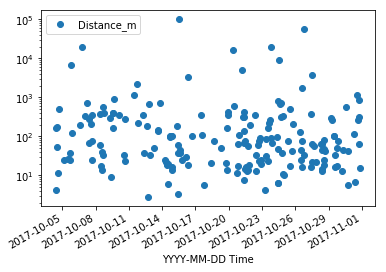

In [6]:
# Examining Error distribution in function of the date
data.plot(x='YYYY-MM-DD Time', y='Distance_m', style='o', logy=True)

## Visualisation of Distance Repartition

### Mean and Quantiles

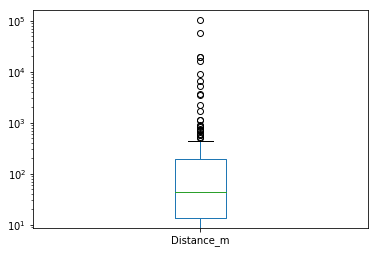

In [7]:
# BoxPlot in logarithmic scale of distance obtained
data.plot(y='Distance_m', kind='box', style='o', logy=True)

### Distribution

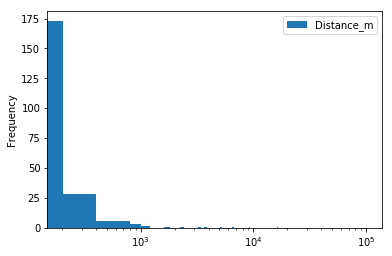

In [8]:
#Histogram of the Distance with logarithmic scale for the x-axis
data.plot(y='Distance_m', kind='hist', style='o', bins=500, logx=True)

## Excluding Exceptional Values

In [37]:
def plot(q):
    # We cut the bigger values from our data set and observe only the quantile we desire, for better graphical representation
    cut_value = data['Distance_m'].quantile(q)
    datasub = data[data['Distance_m'] < cut_value]

    datasub.plot(y='Distance_m', kind='hist', style='o', bins=50)

In [38]:
# Simply a widget to choose which quantile we want to study
quantile = interactive(plot, q=widgets.FloatSlider(min=.05,max=1,step=.05,value=.95))
display(quantile)

interactive(children=(FloatSlider(value=0.95, description='q', max=1.0, step=0.05), Output()), _dom_classes=('…

# Conclusion